In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam, SGD, Adamax
from keras.models import load_model

Using TensorFlow backend.


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score as scikit_f1_score

In [6]:
from keras import backend as K

from keras.models import Model, Input
from keras.layers import Embedding, Dense, Lambda
from keras.regularizers import l2

from keras.utils import to_categorical

#### Custom Functions

In [7]:
import pprint
import os
import sys
sys.path.append('../')

In [8]:
from src.callbacks import PlotCurves
from src.custom_functions import f1_macro, f1_micro 
from src.load_data import load_data

### Load Data

In [9]:
n_tags = 2

In [10]:
train_data, valid_data, test_data, metadata = load_data()

### Prepare data

In [11]:
def split_data(data_, to_categorize):
    
    X = np.array([sentence['sentence'].replace('\n', '').strip() 
                  for article in data_ 
                  for sentence in article['sentences']])

    y = np.array([sentence['label'] 
                  for article in data_
                  for sentence in article['sentences']])

    if to_categorize:
        y = to_categorical(y)
    
    return X, y

In [12]:
X_tra, y_tra = split_data(train_data, False)
X_val, y_val = split_data(valid_data, False)
X_test, y_test = split_data(test_data, False)

### Load ELMo

In [13]:
sess = tf.Session()
K.set_session(sess)

In [14]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [16]:
def elmo_vectors(X):
    embeddings = elmo(X, signature="default", as_dict=True)["default"]

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        return sess.run(embeddings)

In [17]:
batch_size = 32

In [18]:
import json

In [20]:
js_path = 'Data/elmo_embeddigns_X_tra.jsonl'

In [ ]:
with open(js_path, 'a') as jl:
    

In [ ]:
X_tra_elmo = [elmo_vectors([x]) for x in X_tra[:1]]

In [1]:
len(X_tra_elmo)

In [17]:
# X_tra_elmo = elmo_vectors(X_tra)
with open("Data/X_tra_elmo.pickle","wb") as pickle_out:
    pickle.dump(X_tra_elmo, pickle_out)

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[3582,1024,105,44] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node module_apply_default/bilm/CNN/Conv2D_6 (defined at /home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow_hub/native_module.py:547) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[module_apply_default/truediv/_155]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[3582,1024,105,44] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node module_apply_default/bilm/CNN/Conv2D_6 (defined at /home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow_hub/native_module.py:547) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

Original stack trace for 'module_apply_default/bilm/CNN/Conv2D_6':
  File "/usr/local/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/local/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/local/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-132b9b51fd85>", line 1, in <module>
    X_tra_elmo = elmo_vectors(X_tra)
  File "<ipython-input-15-0e8e4d53f85e>", line 2, in elmo_vectors
    embeddings = elmo(X, signature="default", as_dict=True)["default"]
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow_hub/module.py", line 250, in __call__
    name=name)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow_hub/native_module.py", line 547, in create_apply_graph
    import_scope=relative_scope_name)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1449, in import_meta_graph
    **kwargs)[0]
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1473, in _import_meta_graph_with_return_elements
    **kwargs))
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/meta_graph.py", line 855, in import_scoped_meta_graph_with_return_elements
    return_elements=return_elements)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 443, in import_graph_def
    _ProcessNewOps(graph)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 236, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3744, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3744, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3634, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
X_val_elmo = elmo_vectors(X_val)
with open("Data/X_val_elmo.pickle","wb") as pickle_out:
    pickle.dump(X_val_elmo, pickle_out)

In [ ]:
X_test_elmo = elmo_vectors(X_test)
with open("Data/X_test_elmo.pickle","wb") as pickle_out:
    pickle.dump(X_test_elmo, pickle_out)

#load elmo_train_new
with open("elmo_train_03032019.pickle", "rb")
    elmo_train_new = pickle.load(pickle_in)

#load elmo_train_new
with open("elmo_test_03032019.pickle", "rb")
    elmo_test_new = pickle.load(pickle_in)

### Train

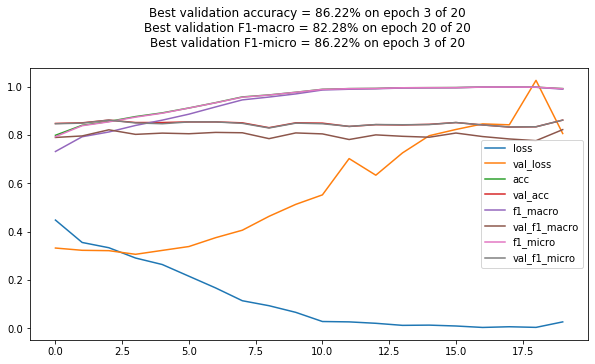

In [29]:
## Flat Model Fit
model.fit(X_tra, y_tra, epochs=20, batch_size=32, validation_data=(X_val, y_val), 
          callbacks=[PlotCurves(model_name=model_name)
#                      , learning_rate_reduction
                    ])

## Load the best Model

In [30]:
import os
model_name 

'RQ1_elmo_flat_model_0_Adamax_lr_0.005_loss_binary_crossentropy'

In [31]:
best_model = load_model('Model/' + model_name + '/' + model_name + '_best_f1_macro_model.h5', custom_objects={'elmo': elmo, 'tf': tf, 'f1_macro':f1_macro, 'f1_micro':f1_micro})

### Validation Set


In [32]:
results_file = os.path.join('Model/' + model_name, 'model_results_file.txt')
        
with open(results_file, 'w') as f:
    f.write('\n----------------\n')

In [33]:
y_val_true = np.array([sentence['label'] for article in valid_data 
                                 for sentence in article['sentences']])

y_val_preds = best_model.predict(X_val, batch_size=32)
y_val_preds = np.argmax(y_val_preds, axis=1)

print(classification_report(y_val_true, y_val_preds))
with open(results_file, 'a') as f:
    f.write(classification_report(y_val_true, y_val_preds))
    f.write('\n')

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       269
           1       0.79      0.79      0.79       130

   micro avg       0.86      0.86      0.86       399
   macro avg       0.84      0.84      0.84       399
weighted avg       0.86      0.86      0.86       399



In [34]:
with open(results_file, 'a') as f:
    f.write(str(scikit_f1_score(y_val_true, y_val_preds,average='macro')))
    f.write('\n')
    
print(scikit_f1_score(y_val_true, y_val_preds,average='macro'))

0.84342558702027


### Test

In [35]:
y_preds = best_model.predict(X_test, batch_size=32)
y_preds = np.argmax(y_preds, axis=1)

In [36]:
### build_flat_model_1 results
print(classification_report(y_test, y_preds))
with open(results_file, 'a') as f:
    f.write(classification_report(y_test, y_preds))
    f.write('\n')

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       325
           1       0.71      0.58      0.64       116

   micro avg       0.83      0.83      0.83       441
   macro avg       0.78      0.75      0.76       441
weighted avg       0.82      0.83      0.82       441



In [37]:
with open(results_file, 'a') as f:
    f.write(str(scikit_f1_score(y_test, y_preds,average='macro')))
    f.write('\n')
    
print(scikit_f1_score(y_test, y_preds,average='macro'))

0.7601584958433688
